    Exercise Week 2

In [60]:
from IPython import display
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Task 1

In [2]:
#read data
data = pd.read_csv('points.txt', names = ['X', 'y'], delimiter = '\s+')

In [3]:
#split into test and train set
train = data.sample(frac = 0.5, random_state= 42)
test = data.drop(train.index)

In [4]:
#define X and y for each set
X_train = train['X']
y_train = train['y']

X_test = test['X']
y_test = test['y']

## 1.a

In [5]:
#defining parameters & matrices
alpha = 2
beta = 25

design_matrix = np.c_[np.ones_like(X_train), X_train]
id_matrix = np.identity(2)

In [8]:
#calculate covariance matrix sigma and mean 
sigma = np.linalg.inv(alpha * id_matrix + beta * design_matrix.T @ design_matrix)
mu = beta * sigma @ design_matrix.T @ y_train

#sample w0 and w1
w = np.random.multivariate_normal(mu.ravel(), sigma,1).T
print(f'w = {w}')

w = [[0.09623914]
 [0.90357692]]


## 1.b

In [44]:
#getting 10 different samples of w, predicting y and saving ys in list
i = 0
y_list = []

while i < 10:
    w = np.random.multivariate_normal(mu.ravel(), sigma,1).T
    y = design_matrix @ w
    y_list.append(y)
    i+=1

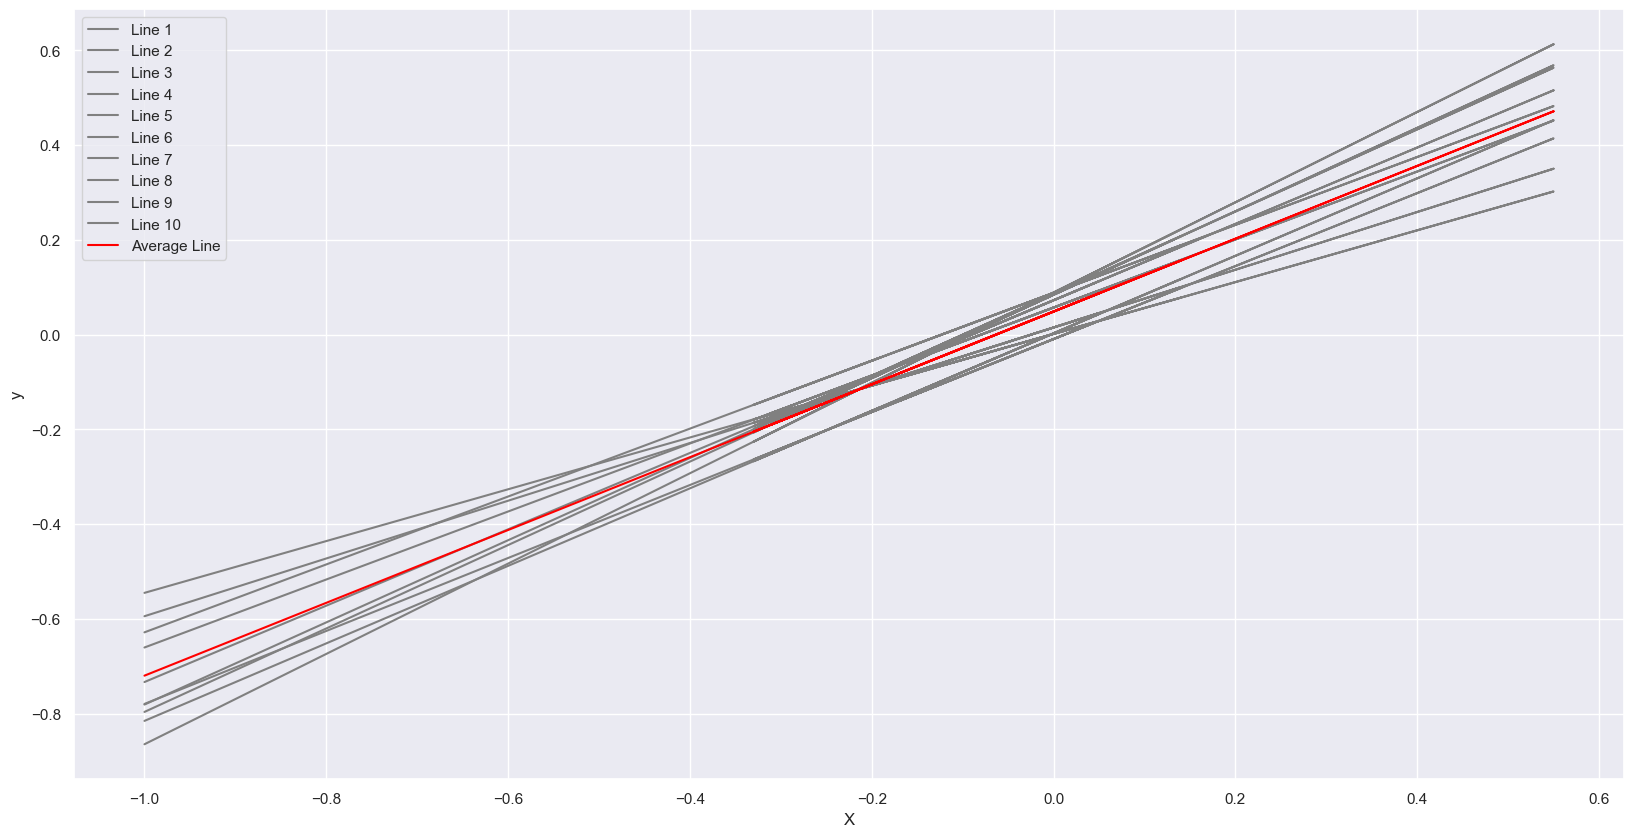

In [55]:
# Create a figure and axis
sns.set(rc={"figure.figsize":(20, 10)}) 
fig, ax = plt.subplots()

for i, values in enumerate(y_list):
    ax.plot(X_train, values, color='grey', label=f'Line {i+1}')

# Calculate mean y for average line
y_matrix = np.hstack(y_list)
y_means = np.mean(y_matrix, axis=1)

#plot average line
ax.plot(X_train, y_means, color='red', label='Average Line')

# Customize the plot
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

## 1.c & 1.d

In [57]:
# Function to score RMSE
def rmse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted) ** 2)
    rmse = np.sqrt(mse).round(3)
    return rmse

In [59]:
#predict y
y_test_pred = w[0] + w[1] * X_test
y_train_pred = w[0] + w[1] * X_train

#calculate RMSE
rmse_test = rmse(y_test, y_test_pred)
rmse_train = rmse(y_train, y_train_pred)
print(f'Train Set RMSE: {rmse_train}\nTest Set RMSE: {rmse_test}')

Train Set RMSE: 0.126
Test Set RMSE: 0.207


# Task 2

## 2.a

In [64]:
#computing X and y
X = np.random.uniform(0,1,250) #uniform distribution between 0 and 1
y = np.sin(2* np.pi * X) + np.random.normal(0, 0.3**2)

## 2.b

## 2.c

## 2.d

# Task 3

## 3.a

## 3.b

## 3.c

## 3.d

## 3.e

## 3.f

## 3.g

# Task 4

The underlying dataset seems to be very unbalanced. More specifically, 95% of datapoint are labelled as "healthy", and only 5% as ill. In cases of datasets that are this heavily unbalanced, models oven achieve the best accuracy if they simply label all the data with one label - as is the case in the example.

Better measure would be Precision or Recall. In the given example, we probably mind it less if healthy people are labelled ill, but want to make sure, that we definitely catch all ill people, so recall would be a good measure.

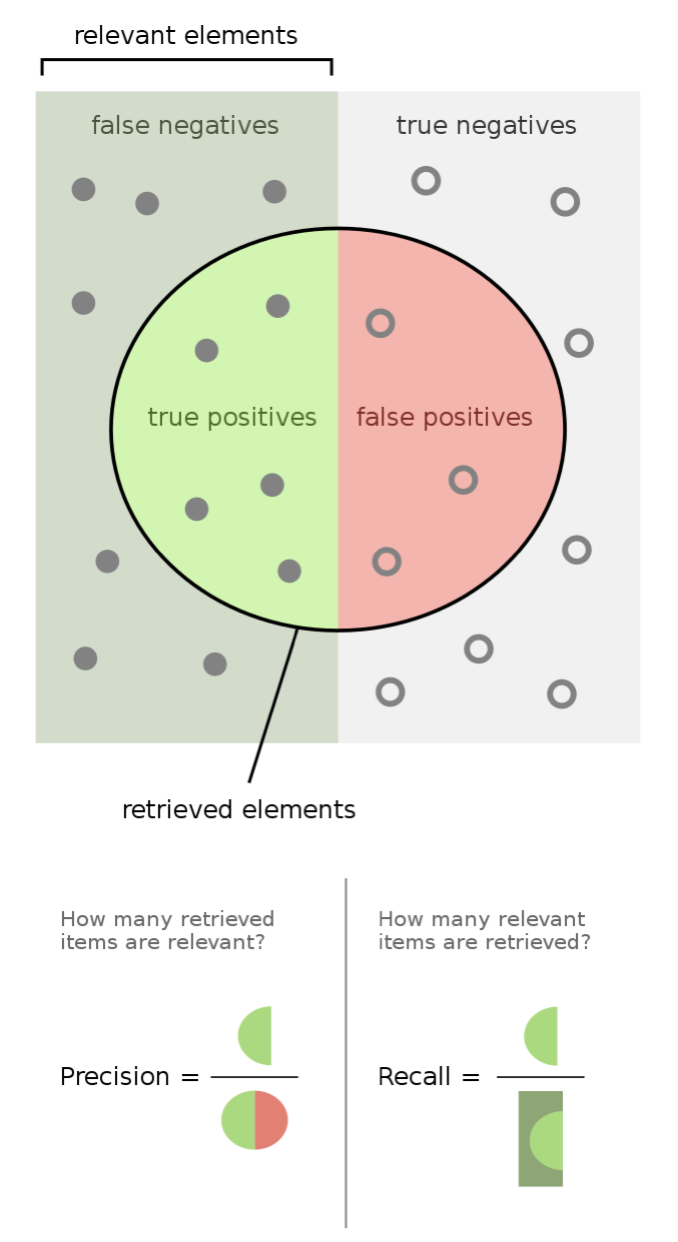

In [7]:
display.Image('/Users/emilykruger/Documents/GitHub/AML4KCS2023/exercises/w02_regression_classification/Screenshot 2023-09-06 at 13.45.11.png')